### Image classification, conceptual idea for possible mobile application in COBB County.
Train some images to classify flowers or tree or any types. More categories are possilbe if we collect more pictures. Final model can be exported to a Nerual network model of mobilnet.v2 for a mobile device application so citizen can use mobile device camera to take and save a picture. The app will automatically give the classification and submit a report to County department.
TensorFlow Lite is a lightweight solution to this problem. It reduces the overall compute requirement and size of the model making it easy to ship on mobile devices. It also supports hardware acceleration that inturn enables low-latency inferencing on mobile devices, which allows us to build real-time applications on top of it. Learn more about TensorFlow Lite here

In [1]:
#!pip install -q tflite-model-maker

In [2]:
import os
import numpy as np
import tensorflow as tf
assert tf.__version__.startswith('2')

from tflite_model_maker import model_spec
from tflite_model_maker import image_classifier
from tflite_model_maker.config import ExportFormat
from tflite_model_maker.config import QuantizationConfig
from tflite_model_maker.image_classifier import DataLoader
from tflite_model_maker.image_classifier import ModelSpec

import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
image_path = tf.keras.utils.get_file(
      'flower_photos.tgz',
      'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
      extract=True)
print (image_path)

228818944/228813984 [==============================] - 22s 0us/step
C:\Users\zhangc\.keras\datasets\flower_photos.tgz


In [10]:
image_path = os.path.join(os.path.dirname(image_path), 'flower_photos')
print (image_path)

C:\Users\zhangc\.keras\datasets\flower_photos


In [11]:
data = DataLoader.from_folder(image_path)
train_data, rest_data = data.split(0.8)
validation_data, test_data = rest_data.split(0.5)

INFO:tensorflow:Load image with size: 3779, num_label: 6, labels: daisy, dandelion, pinkyellow, roses, sunflowers, tulips.


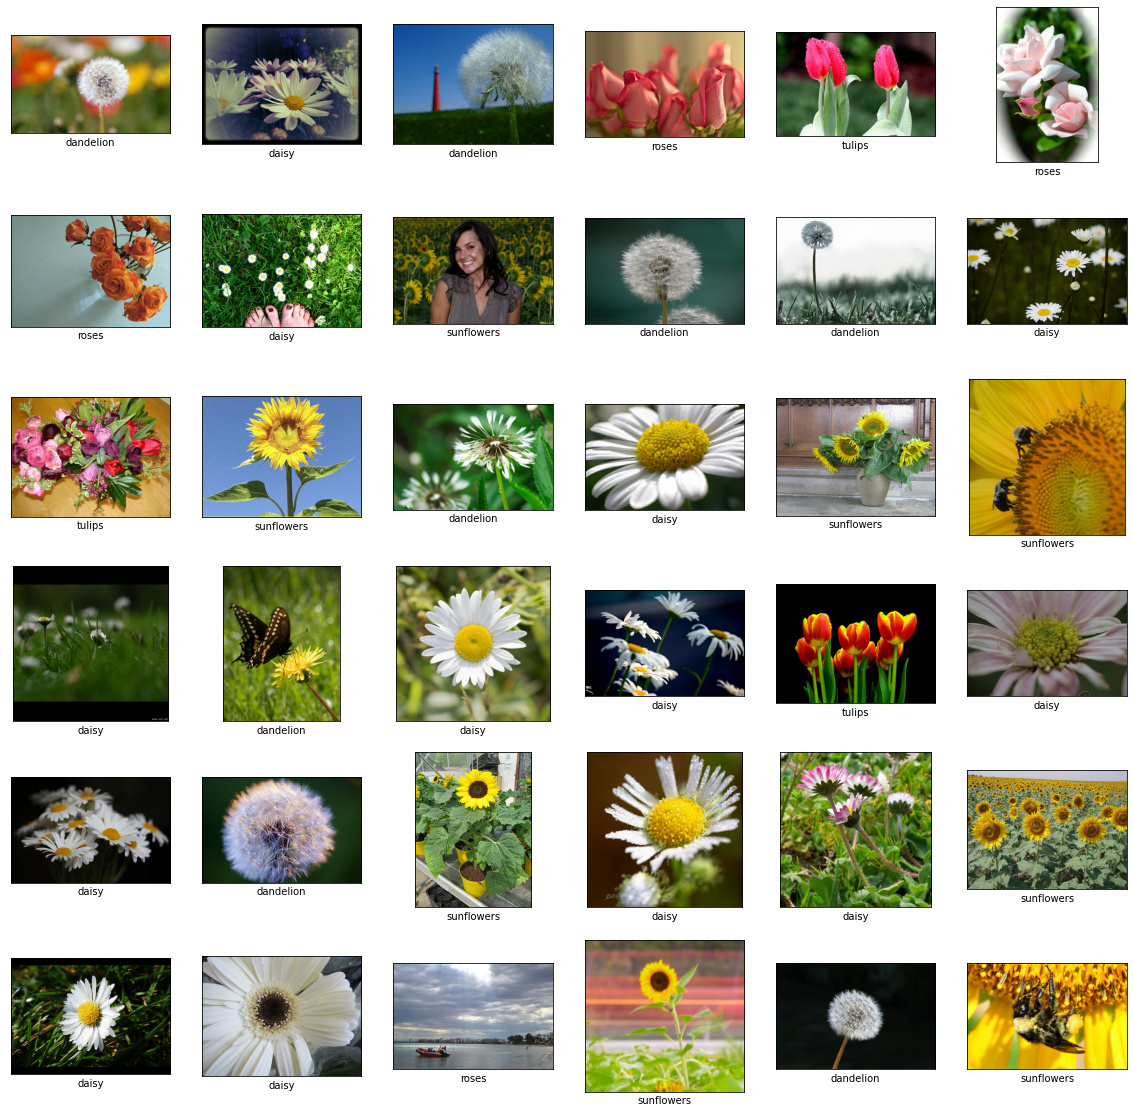

In [12]:
%matplotlib inline
plt.figure(figsize=(20,20))
for i, (image, label) in enumerate(data.gen_dataset().unbatch().take(36)):
  plt.subplot(6,6,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)
  plt.xlabel(data.index_to_label[label.numpy()])
plt.show()

In [13]:
model = image_classifier.create(train_data, validation_data=validation_data)

INFO:tensorflow:Retraining the models...
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hub_keras_layer_v1v2 (HubKer (None, 1280)              3413024   
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 6)                 7686      
Total params: 3,420,710
Trainable params: 7,686
Non-trainable params: 3,413,024
_________________________________________________________________
None
Epoch 1/5
94/94 [==============================] - 56s 582ms/step - loss: 1.2577 - accuracy: 0.5791 - val_loss: 0.7284 - val_accuracy: 0.8693
Epoch 2/5
94/94 [==============================] - 55s 588ms/step - loss: 0.7259 - accuracy: 0.8837 - val_loss: 0.6926 - val_accuracy: 0.8864
Epoch 3/5
94/94 [=========================

In [14]:
loss, accuracy = model.evaluate(test_data)

12/12 [==============================] - 9s 444ms/step - loss: 0.6756 - accuracy: 0.9127


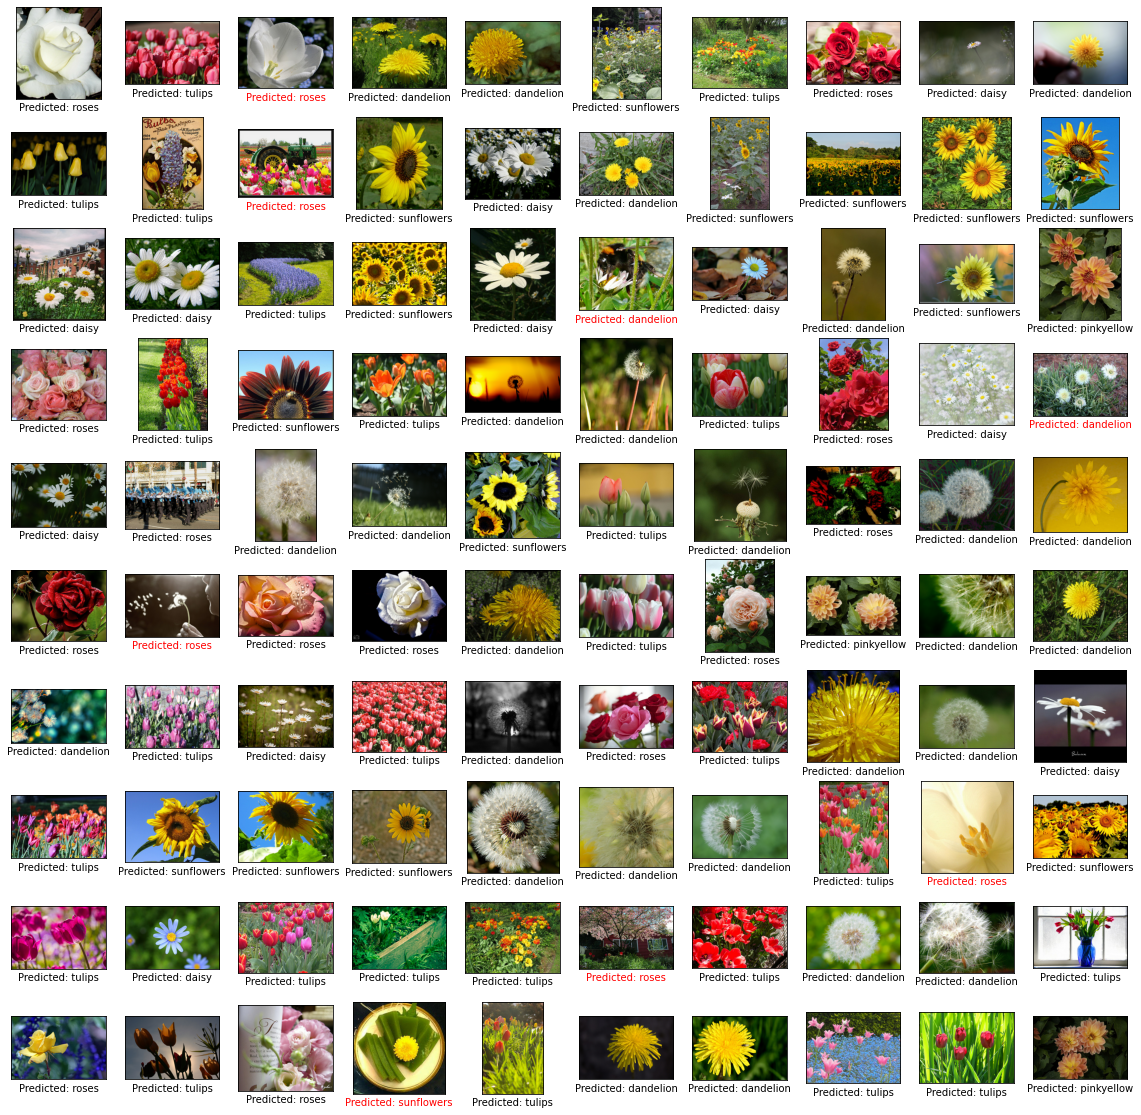

In [15]:
# A helper function that returns 'red'/'black' depending on if its two input
# parameter matches or not.
def get_label_color(val1, val2):
  if val1 == val2:
    return 'black'
  else:
    return 'red'

# Then plot 100 test images and their predicted labels.
# If a prediction result is different from the label provided label in "test"
# dataset, we will highlight it in red color.
plt.figure(figsize=(20, 20))
predicts = model.predict_top_k(test_data)
for i, (image, label) in enumerate(test_data.gen_dataset().unbatch().take(100)):
  ax = plt.subplot(10, 10, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)

  predict_label = predicts[i][0][0]
  color = get_label_color(predict_label,
                          test_data.index_to_label[label.numpy()])
  ax.xaxis.label.set_color(color)
  plt.xlabel('Predicted: %s' % predict_label)
plt.show()

In [17]:
model.export(export_dir='.', with_metadata=False)

INFO:tensorflow:Assets written to: C:\Users\zhangc\AppData\Local\Temp\tmpkeaux93n\assets


INFO:tensorflow:Assets written to: C:\Users\zhangc\AppData\Local\Temp\tmpkeaux93n\assets


INFO:tensorflow:TensorFlow Lite model exported successfully: .\model.tflite


INFO:tensorflow:TensorFlow Lite model exported successfully: .\model.tflite


INFO:tensorflow:Saving labels in .\labels.txt.


INFO:tensorflow:Saving labels in .\labels.txt.
